# PART 1: Dimensionality Reduction using PCA

# Load and Explore the Dataset

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Print the first 5 rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# Apply PCA for Dimensionality Reduction

In [31]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Create a new DataFrame with the reduced data
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['target'] = iris.target

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)



Explained Variance Ratio: [0.92461872 0.05306648]


# Visualize the PCA Results

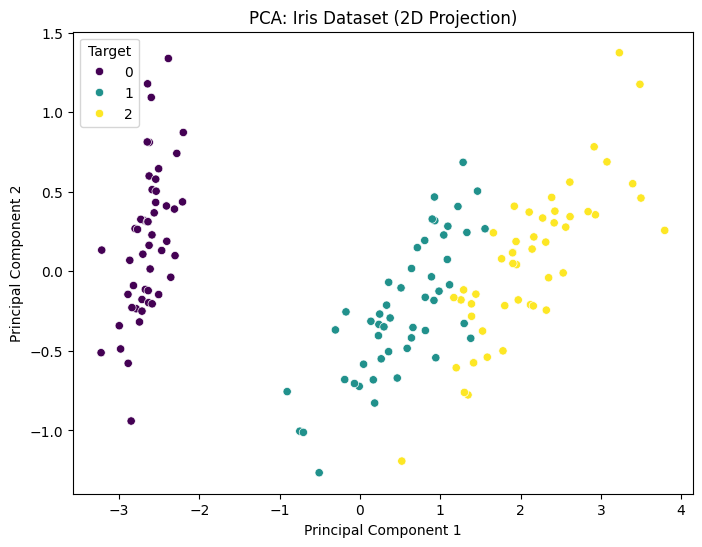

In [33]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["target"], palette="viridis")
plt.title("PCA: Iris Dataset (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Target")
plt.show()


# PART 2: Stock Price Prediction using ARIMA

# Load and Preprocess the Dataset

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("stock_prices.csv", parse_dates=["Date"])

# Set Date as index
df.set_index("Date", inplace=True)


# Handle missing values
df.ffill(inplace=True)  # Forward fill missing values



# Print dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    365 non-null    float64
 1   Close   365 non-null    float64
 2   Volume  365 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.4 KB
None
                  Open       Close  Volume
Date                                      
2023-01-01  100.993428  100.391598    1074
2023-01-02  200.716900  201.053038    3885
2023-01-03  302.012277  302.031165    4217
2023-01-04  405.058336  405.204851    3175
2023-01-05  504.590030  503.430515    4924


# Exploratory Data Analysis (EDA)

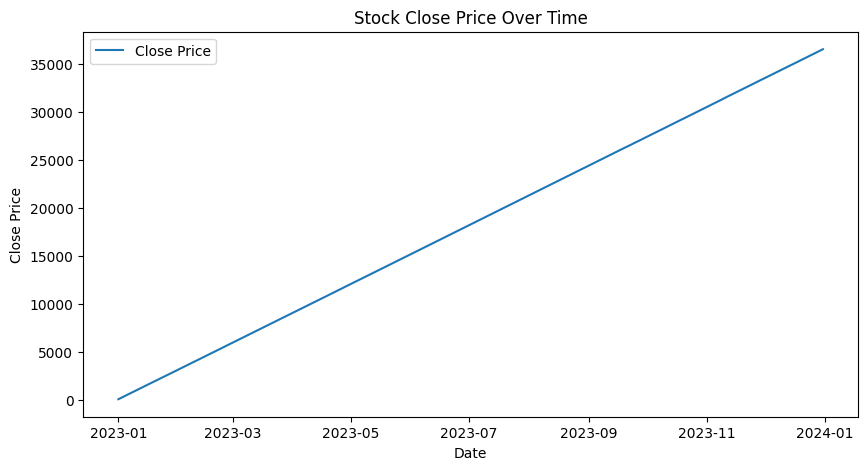

In [38]:
# Plot the closing price over time
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label="Close Price")
plt.title("Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


# Check Stationarity & Differencing

In [40]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(df['Close'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-Value: {adf_test[1]}")

# If P-Value > 0.05, the data is non-stationary → Apply differencing
df['Close_diff'] = df['Close'].diff().dropna()


ADF Statistic: 1.2528583035524254
P-Value: 0.9963314901794221


# Train ARIMA Model

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

print(df.isna().sum())  # Check for NaN values in each column
df.dropna(inplace=True)

import numpy as np
print(np.isinf(df['Close']).sum())  # Check for infinite values

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

from pmdarima import auto_arima

stepwise_fit = auto_arima(df['Close'], seasonal=False, trace=True)
print(stepwise_fit.summary())

p, d, q = 5, 1, 1  # Lower the q value
model = ARIMA(df['Close'], order=(p, d, q))
arima_result = model.fit()

# If p-value > 0.05, apply differencing
if result[1] > 0.05:
    df['Close'] = df['Close'].diff().dropna()  # First-order differencing

# Define ARIMA model (p, d, q) - Example values
p, d, q = 5, 1, 2
model = ARIMA(df['Close'], order=(p, d, q))
arima_result = model.fit()

# Print model summary
print(arima_result.summary())


ADF Statistic: 1.2528583035524254
p-value: 0.9963314901794221
Open          0
Close         0
Volume        0
Close_diff    1
dtype: int64
0
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1768.050, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1808.447, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1765.727, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1763.653, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4375.910, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1766.578, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1764.677, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1767.547, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3914.680, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.094 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:         

C:\Users\jaivi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jaivi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jaivi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jaivi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jaivi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  364
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -885.616
Date:                Thu, 27 Mar 2025   AIC                           1787.232
Time:                        21:30:33   BIC                           1818.387
Sample:                    01-02-2023   HQIC                          1799.616
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3361      0.097    -13.712      0.000      -1.527      -1.145
ar.L2         -0.4408      0.098     -4.505      0.000      -0.633      -0.249
ar.L3         -0.0734      0.087     -0.839      0.4

# Forecast Future Stock Prices

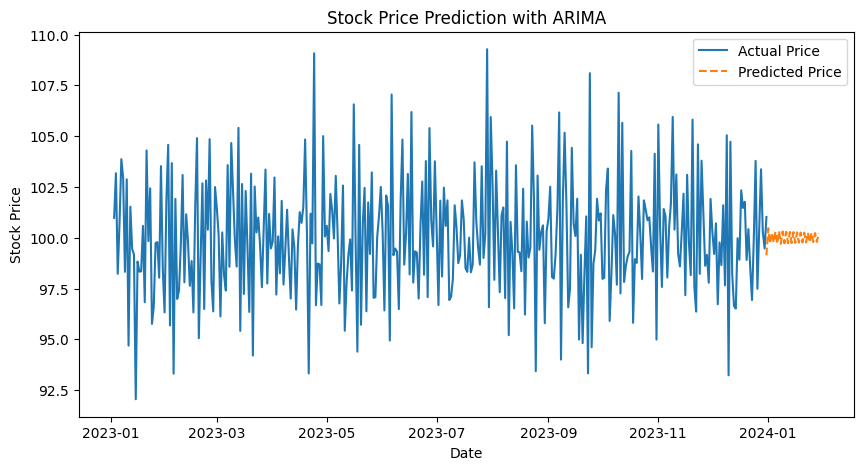

In [47]:
# Forecast the next 30 days
forecast = arima_result.forecast(steps=30)

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label="Actual Price")
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label="Predicted Price", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction with ARIMA")
plt.legend()
plt.show()


# Evaluate Model Performance

In [58]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Actual vs Predicted values (for comparison)
actual = df['Close'][-30:]
predicted = forecast[:30]

# Compute errors
mae = mean_absolute_error(actual, predicted)
rmse = root_mean_squared_error(actual, predicted)  # Updated function

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1.8392941543514283
Root Mean Squared Error (RMSE): 2.4546911490298466
